# PCAP Plotter

This program allows to generate plots of different pieces of information extracted from PCAP files. 

The work is organized as follows: 

1. Preparing the ground for the experiments.
2. Comparing the features extracted from the different Applications.
3. Listing the features of each app independently, for more details.

## 1. Preparation

This first section allows to prepare the experiment's environment, typically by:
1. Importing necessary libraries.
2. Loading the preprocessed dataset.
3. Extracting necessary attributes from the data and formatting them to a data frame.
4. Customizing the plots. 

### 1.1 Imports

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 1.2 Dataset Loading

In [3]:
# Load the preprocessed JSON file
with open("pcap-analyser/src/preprocessed_dataset.json", "r") as f:
    data = json.load(f)

### 1.3 Data Formatting

In [4]:
# Extract APP names
app_names = list(data.keys())

# Extract app-level averages for comparison
avg_data = []
for app, values in data.items():
    avg_data.append({
        "App": app,
        "Average Packet Size (Bytes)": values["average"]["packet_size_avg"],
        "Uplink Bitrate (Mbps)": values["average"]["uplink_bitrate"],
        "Downlink Bitrate (Mbps)": values["average"]["downlink_bitrate"],
        "Average Interarrival Time (ms)": values["average"]["interarrival_time_avg"],
        "Average PCAP Size (MB)": values["average"]["average_pcap_size_mb"],
        "Dominant Protocol": values["average"]["dominant_protocol"]
    })

# Convert data into a structured DataFrame
avg_df = pd.DataFrame(avg_data)

### 1.4 Plot Customization

In [5]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

"""
All available choices:

- "darkgrid": Default Seaborn style with a dark grid.
- "whitegrid": Light background with a grid.
- "dark": Dark background without grid lines.
- "white": White background without grid lines.
- "ticks": White background with ticks on both axes.
"""

'\nAll available choices:\n\n- "darkgrid": Default Seaborn style with a dark grid.\n- "whitegrid": Light background with a grid.\n- "dark": Dark background without grid lines.\n- "white": White background without grid lines.\n- "ticks": White background with ticks on both axes.\n'

## 2. Comparative Multi-App Visualizations

In this section we present a comparative analysis of the main features extracted from the dataset, which encompasses:

- PCAPs and Packets.
- Bitrates (Up-link and Down-link).
- Packet's Interarrival Times.
- Communication Protocols.

### 2.1 Analysis of PCAPs and Packets

#### 2.1.1 Number of PCAPs

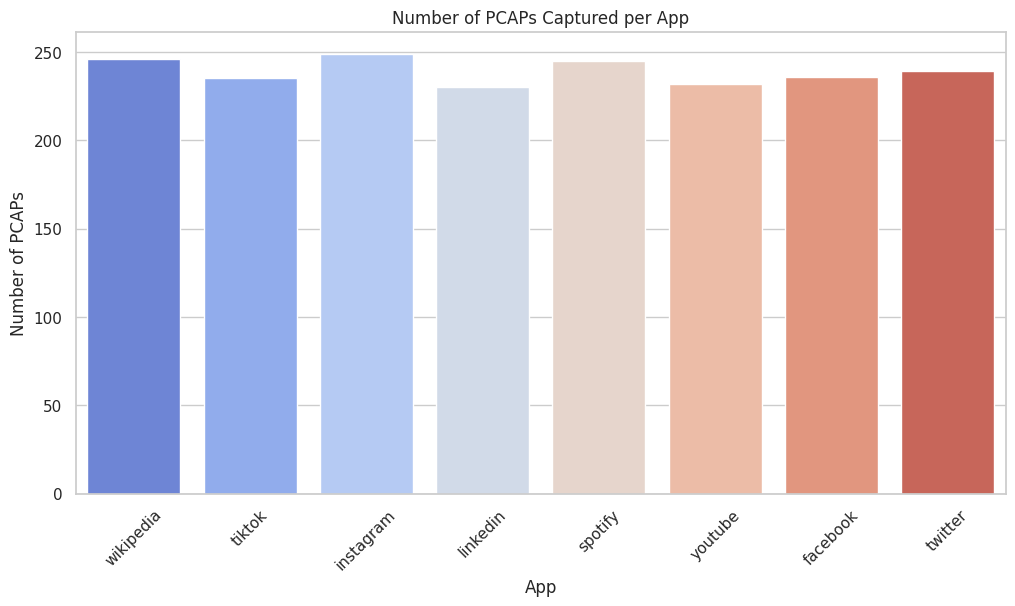

In [15]:
# Count the number of PCAPs per app
pcap_counts = {app: len(data[app]["pcaps"]) for app in app_names}

# Convert to DataFrame
pcap_count_df = pd.DataFrame(list(pcap_counts.items()), columns=["App", "Number of PCAPs"])

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x="App", y="Number of PCAPs", data=pcap_count_df, palette="coolwarm", hue="App", legend=False)
plt.title("Number of PCAPs Captured per App")
plt.xlabel("App")
plt.ylabel("Number of PCAPs")
plt.xticks(rotation=45)
plt.show()

#### 2.1.2 Average PCAP-files Sizes

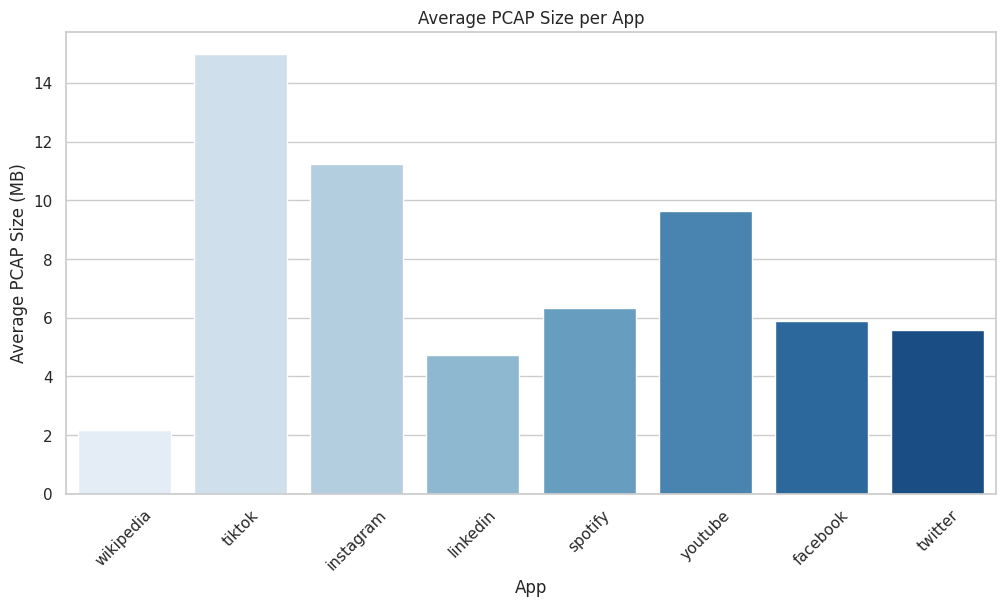

In [16]:
# Extract average PCAP size for each app
avg_pcap_sizes = {app: data[app]["average"]["average_pcap_size_mb"] for app in app_names}

# Convert to DataFrame
avg_pcap_size_df = pd.DataFrame(list(avg_pcap_sizes.items()), columns=["App", "Average PCAP Size (MB)"])

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x="App", y="Average PCAP Size (MB)", data=avg_pcap_size_df, palette="Blues", hue="App", legend=False)
plt.title("Average PCAP Size per App")
plt.xlabel("App")
plt.ylabel("Average PCAP Size (MB)")
plt.xticks(rotation=45)
plt.show()

#### 2.1.3 Distribution of PCAP Size

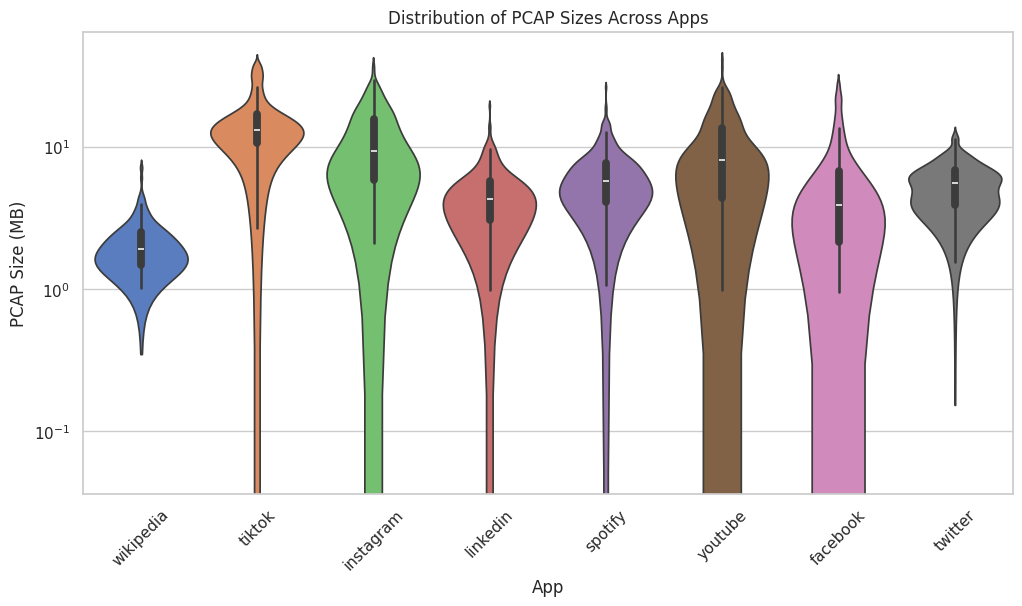

In [17]:
# Gather all PCAP sizes from each app
pcap_size_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        pcap_size_data.append({"App": app, "PCAP Size (MB)": pcap["total_size_mb"]})

# Convert to DataFrame
pcap_size_df = pd.DataFrame(pcap_size_data)

# Violin Plot - Variability of PCAP Sizes
plt.figure(figsize=(12, 6))
sns.violinplot(x="App", y="PCAP Size (MB)", data=pcap_size_df, palette="muted", hue="App", legend=False)
plt.title("Distribution of PCAP Sizes Across Apps")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale to handle large variations in PCAP sizes
plt.show()

#### 2.1.4 Number of Packets

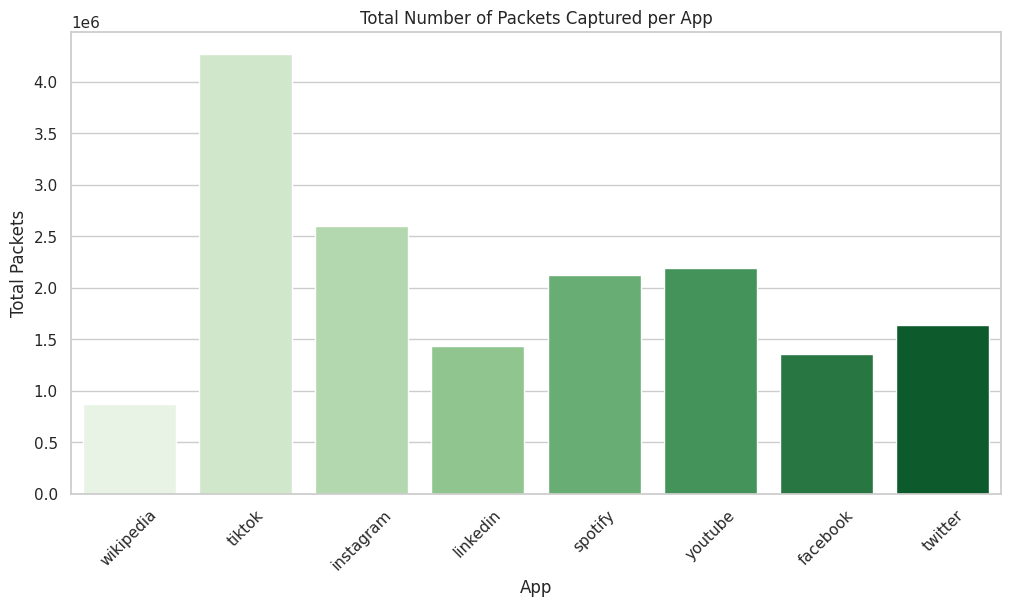

In [18]:
# Count total packets per app
total_packets_per_app = {app: sum(len(pcap["packet_sizes"]) for pcap in data[app]["pcaps"]) for app in app_names}

# Convert to DataFrame
total_packets_df = pd.DataFrame(list(total_packets_per_app.items()), columns=["App", "Total Packets"])

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x="App", y="Total Packets", data=total_packets_df, palette="Greens", hue="App", legend=False)
plt.title("Total Number of Packets Captured per App")
plt.xlabel("App")
plt.ylabel("Total Packets")
plt.xticks(rotation=45)
plt.show()

#### 2.1.5 Comparison of Packet Sizes

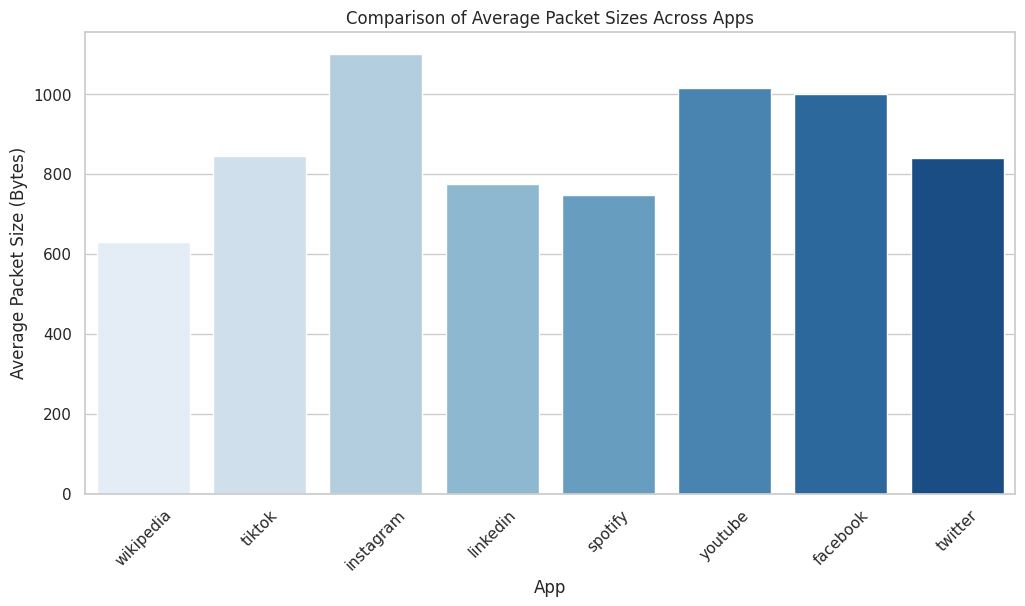

In [19]:
# Average Packet Size Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="App", y="Average Packet Size (Bytes)", data=avg_df, palette="Blues", hue="App", legend=False)
plt.title("Comparison of Average Packet Sizes Across Apps")
plt.xticks(rotation=45)
plt.show()

#### 2.1.6 Distribution of Packet Sizes

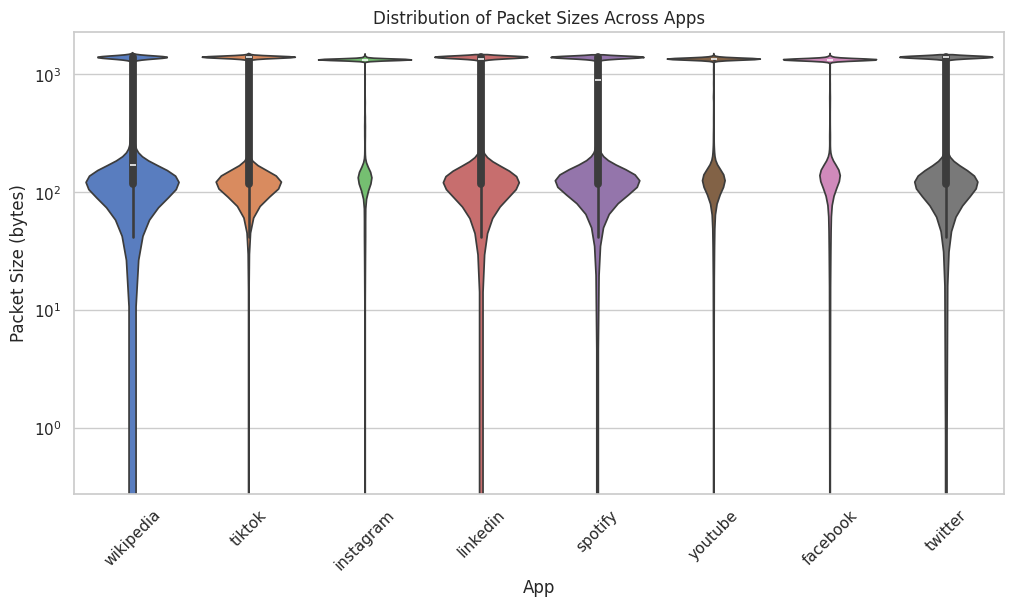

In [8]:
# Gather all packet sizes from all PCAPs of each app
packet_size_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        for pkt_size in pcap["packet_sizes"]:
            packet_size_data.append({"App": app, "Packet Size (bytes)": pkt_size})

# Convert to DataFrame
packet_size_df = pd.DataFrame(packet_size_data)

# Violin Plot - Variability of Packet Sizes
plt.figure(figsize=(12, 6))
sns.violinplot(x="App", y="Packet Size (bytes)", data=packet_size_df, palette="muted", hue="App", legend=False)
plt.title("Distribution of Packet Sizes Across Apps")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale to handle wide range of packet sizes
plt.show()

#### 2.1.7 Comparison between Packet Sizes and Packet Counts

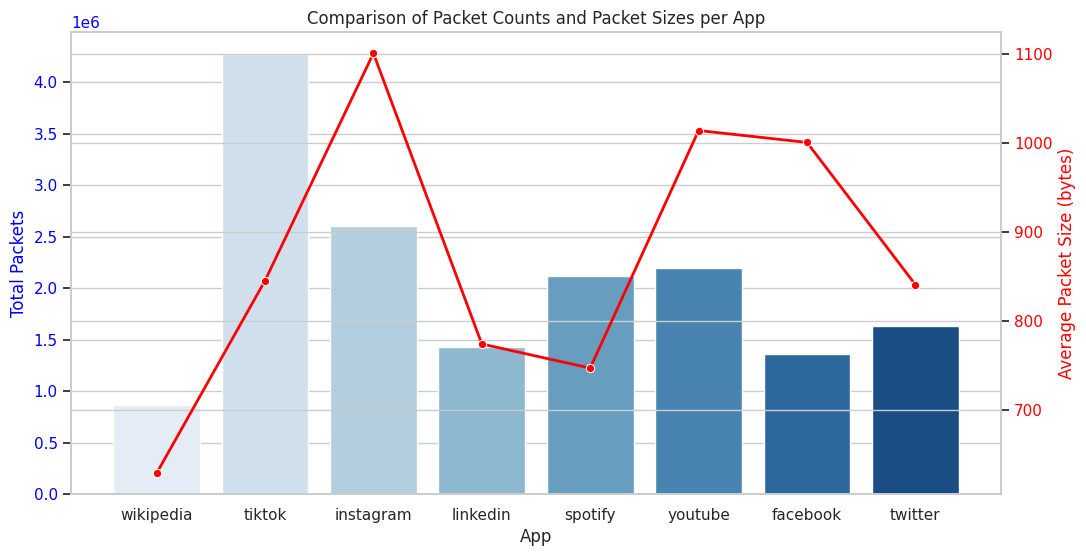

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Extract data
total_packets = {app: sum(len(pcap["packet_sizes"]) for pcap in data[app]["pcaps"]) for app in app_names}
avg_packet_sizes = {app: data[app]["average"]["packet_size_avg"] for app in app_names}

# Convert to DataFrame
combined_df = pd.DataFrame({"App": app_names, 
                            "Total Packets": [total_packets[app] for app in app_names], 
                            "Average Packet Size": [avg_packet_sizes[app] for app in app_names]})

# Bar plot for total packets (Left Y-axis)
sns.barplot(x="App", y="Total Packets", data=combined_df, palette="Blues", ax=ax1, hue="App")
ax1.set_ylabel("Total Packets", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Line plot for average packet size (Right Y-axis)
ax2 = ax1.twinx()
sns.lineplot(x="App", y="Average Packet Size", data=combined_df, color="red", marker="o", linewidth=2, ax=ax2)
ax2.set_ylabel("Average Packet Size (bytes)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Titles & Formatting
plt.title("Comparison of Packet Counts and Packet Sizes per App")
plt.xticks(rotation=45)
plt.show()

#### 2.1.8 Correlation between Packet Sizes and PCAP sizes

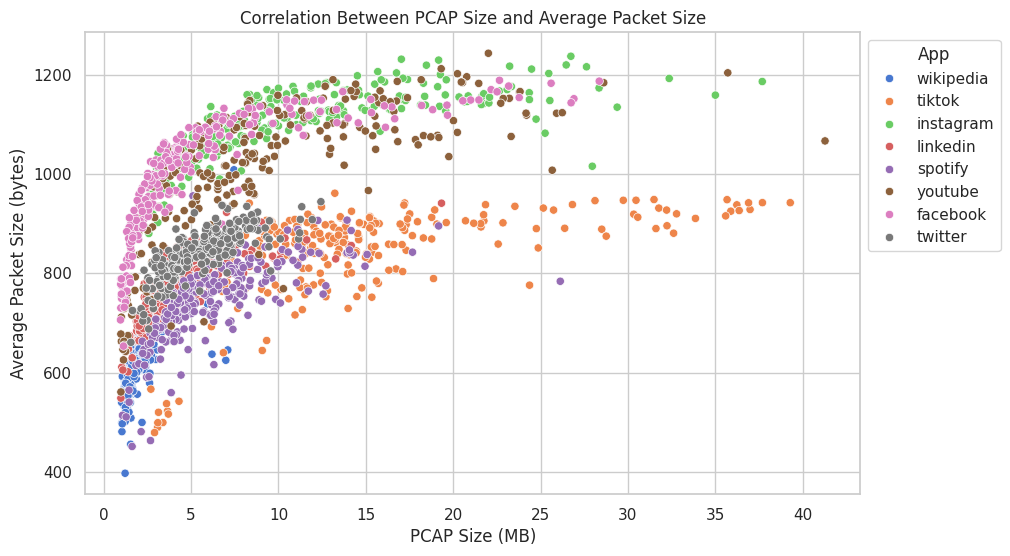

Pearson Correlation Coefficient: 0.5474
P-Value: 0.0000
Correlation is statistically significant!


In [9]:
from scipy.stats import pearsonr

# Collect data for correlation analysis
correlation_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        correlation_data.append({
            "App": app,
            "PCAP Size (MB)": pcap["total_size_mb"],
            "Average Packet Size (Bytes)": pcap["avg_packet_size"]
        })

# Convert to DataFrame
corr_df = pd.DataFrame(correlation_data)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCAP Size (MB)", y="Average Packet Size (Bytes)", hue="App", data=corr_df, palette="muted")
plt.title("Correlation Between PCAP Size and Average Packet Size")
plt.xlabel("PCAP Size (MB)")
plt.ylabel("Average Packet Size (bytes)")
plt.legend(title="App", bbox_to_anchor=(1, 1))
plt.show()

# Calculate Pearson correlation coefficient
corr_value, p_value = pearsonr(corr_df["PCAP Size (MB)"], corr_df["Average Packet Size (Bytes)"])
print(f"Pearson Correlation Coefficient: {corr_value:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Correlation is statistically significant!")
else:
    print("Correlation is likely due to randomness.")

#### 2.1.9 Correlation between Traffic Volume and PCAP Size

##### Computing Total Traffic Volumes

In [10]:
traffic_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        total_bytes = sum(pcap["packet_sizes"])  # Total traffic volume in bytes
        total_packets = len(pcap["packet_sizes"])  # Total number of packets

        traffic_data.append({
            "App": app,
            "PCAP Size (MB)": pcap["total_size_mb"],
            "Total Bytes Transferred": total_bytes,
            "Total Packets": total_packets,
            "Bitrate (Mbps)": pcap["uplink_bitrate"] + pcap["downlink_bitrate"]
        })

traffic_df = pd.DataFrame(traffic_data)

##### Total Bytes Transferred vs. PCAP Size

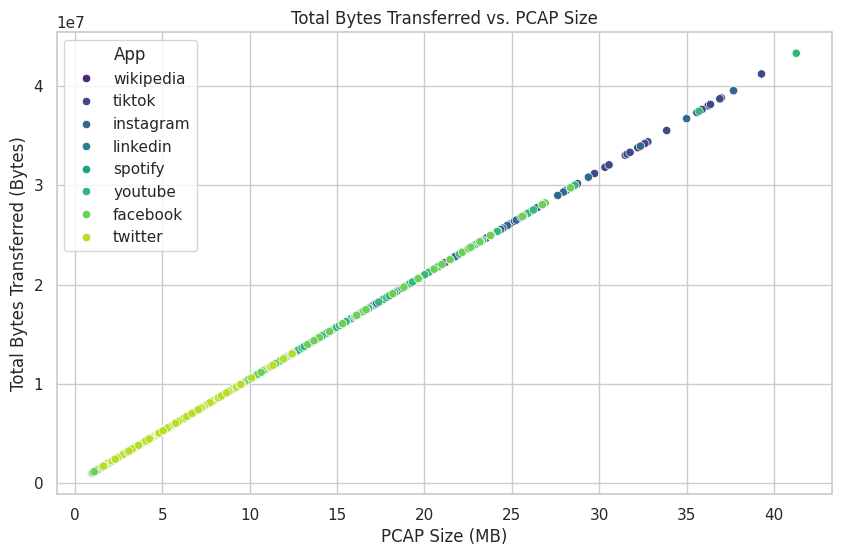

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCAP Size (MB)", y="Total Bytes Transferred", hue="App", data=traffic_df, palette="viridis")
plt.title("Total Bytes Transferred vs. PCAP Size")
plt.xlabel("PCAP Size (MB)")
plt.ylabel("Total Bytes Transferred (Bytes)")
plt.legend(title="App")
plt.show()

##### Packet Count vs. PCAP Size

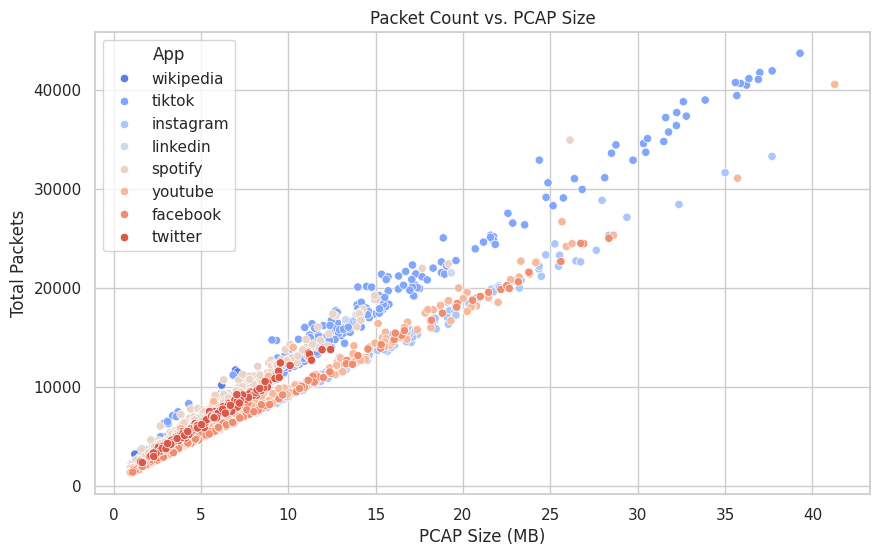

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCAP Size (MB)", y="Total Packets", hue="App", data=traffic_df, palette="coolwarm")
plt.title("Packet Count vs. PCAP Size")
plt.xlabel("PCAP Size (MB)")
plt.ylabel("Total Packets")
plt.legend(title="App")
plt.show()

### 2.2 Analysis of Bitrates

#### 2.2.1 Comparison of Uplink and Downlink Bitrates

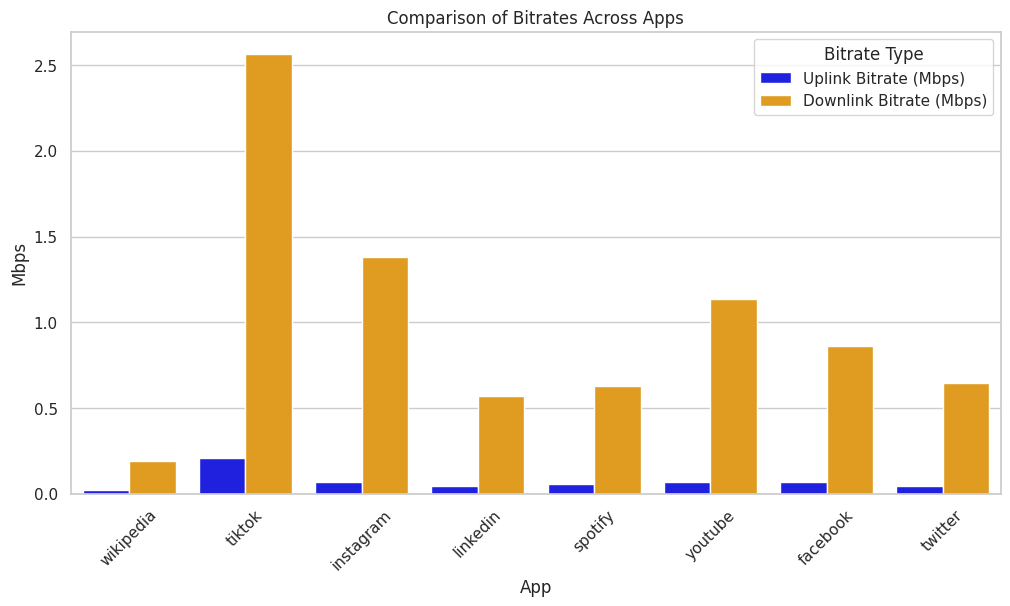

In [13]:
# Bitrate Comparison
plt.figure(figsize=(12, 6))
avg_df_melted = avg_df.melt(id_vars=["App"], value_vars=["Uplink Bitrate (Mbps)", "Downlink Bitrate (Mbps)"], var_name="Bitrate Type", value_name="Mbps")
sns.barplot(x="App", y="Mbps", hue="Bitrate Type", data=avg_df_melted, palette=["blue", "orange"])
plt.title("Comparison of Bitrates Across Apps")
plt.xticks(rotation=45)
plt.show()

#### 2.2.2 Comparison of Bitrate Fluctuations

##### For Uplink Bitrates

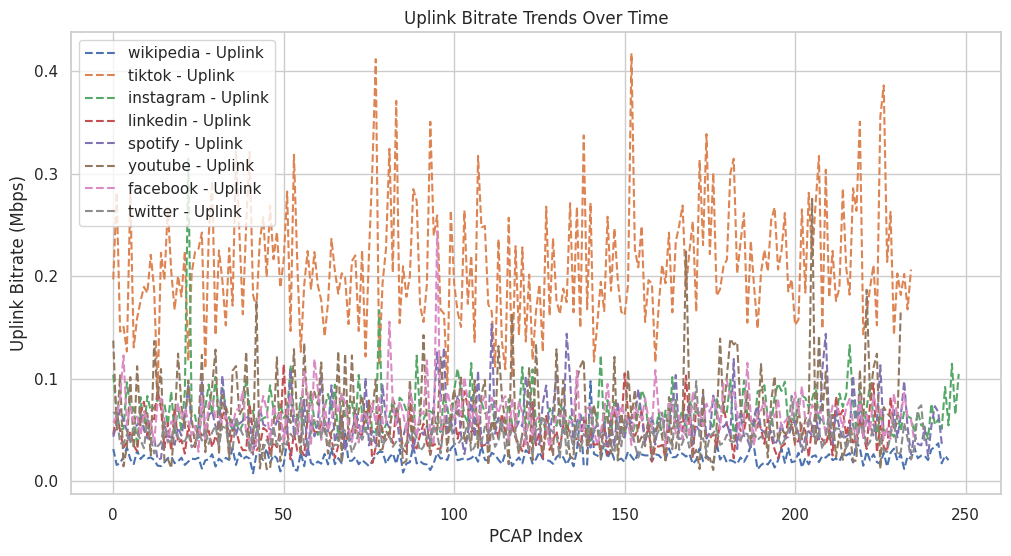

In [14]:
plt.figure(figsize=(12, 6))
for app in app_names:
    app_data = pd.DataFrame(data[app]["pcaps"])
    plt.plot(range(len(app_data)), app_data["uplink_bitrate"], label=f"{app} - Uplink", linestyle="dashed")

plt.legend()
plt.xlabel("PCAP Index")
plt.ylabel("Uplink Bitrate (Mbps)")
plt.title("Uplink Bitrate Trends Over Time")
plt.show()

##### For Downlink Bitrates

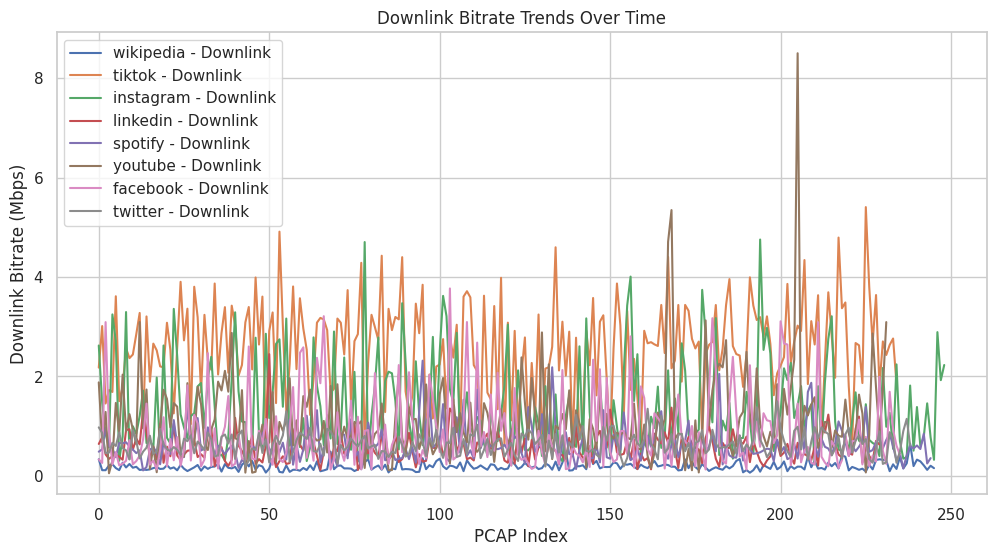

In [15]:
plt.figure(figsize=(12, 6))
for app in app_names:
    app_data = pd.DataFrame(data[app]["pcaps"])
    plt.plot(range(len(app_data)), app_data["downlink_bitrate"], label=f"{app} - Downlink")

plt.legend()
plt.xlabel("PCAP Index")
plt.ylabel("Downlink Bitrate (Mbps)")
plt.title("Downlink Bitrate Trends Over Time")
plt.show()

#### 2.2.3 Uplink and Downlink Ratio

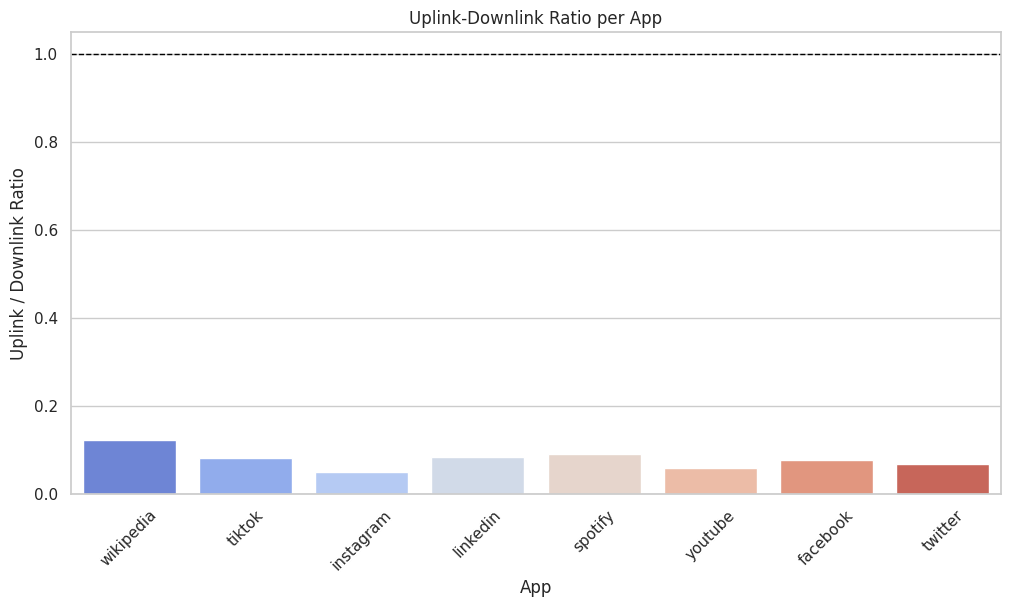

In [16]:
# Compute uplink-downlink ratio for each app
uplink_downlink_ratios = {}
for app in app_names:
    uplink = data[app]["average"]["uplink_bitrate"]
    downlink = data[app]["average"]["downlink_bitrate"]
    
    # Avoid division by zero (if downlink is 0, set ratio to NaN)
    ratio = uplink / downlink if downlink > 0 else float("nan")
    uplink_downlink_ratios[app] = ratio

# Convert to DataFrame
uplink_downlink_df = pd.DataFrame(list(uplink_downlink_ratios.items()), columns=["App", "Uplink-Downlink Ratio"])

# Bar plot to visualize ratios
plt.figure(figsize=(12, 6))
sns.barplot(x="App", y="Uplink-Downlink Ratio", data=uplink_downlink_df, palette="coolwarm", hue="App")
plt.axhline(y=1, color="black", linestyle="dashed", linewidth=1)  # Reference line for equal uplink/downlink
plt.title("Uplink-Downlink Ratio per App")
plt.xlabel("App")
plt.ylabel("Uplink / Downlink Ratio")
plt.xticks(rotation=45)
plt.show()

#### 2.2.4 Correlation between PCAP Size and Bitrate

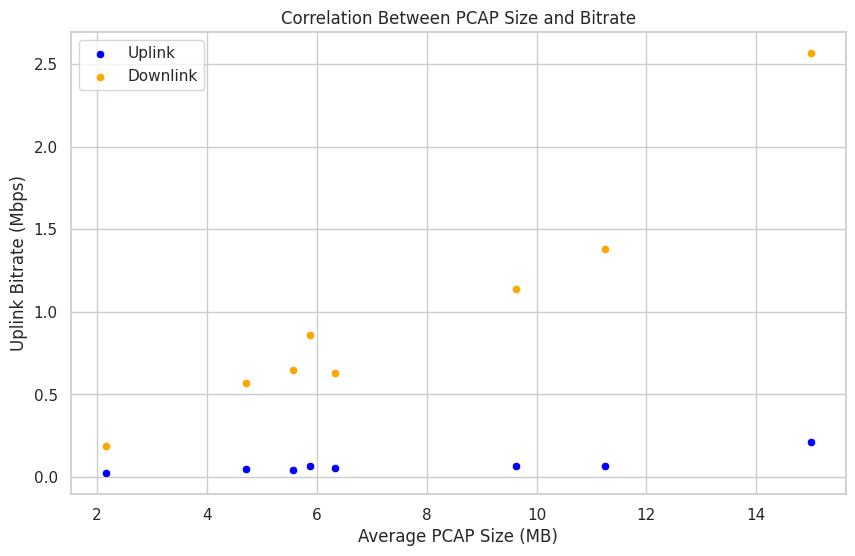

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Average PCAP Size (MB)", y="Uplink Bitrate (Mbps)", data=avg_df, color="blue", label="Uplink")
sns.scatterplot(x="Average PCAP Size (MB)", y="Downlink Bitrate (Mbps)", data=avg_df, color="orange", label="Downlink")
plt.title("Correlation Between PCAP Size and Bitrate")
plt.legend()
plt.show()

#### 2.2.5 Correlation between Packet Count or Packet Sizes, and Bitrates

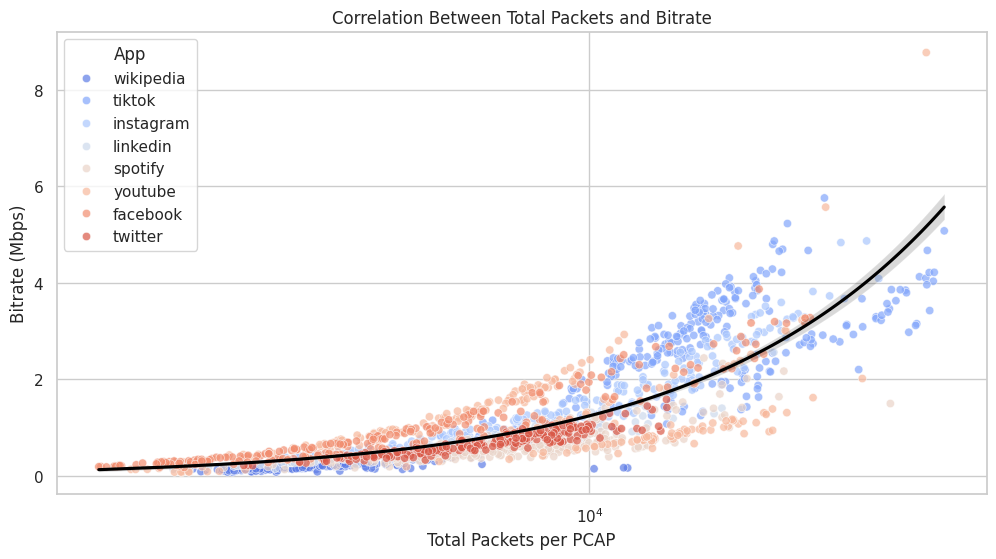

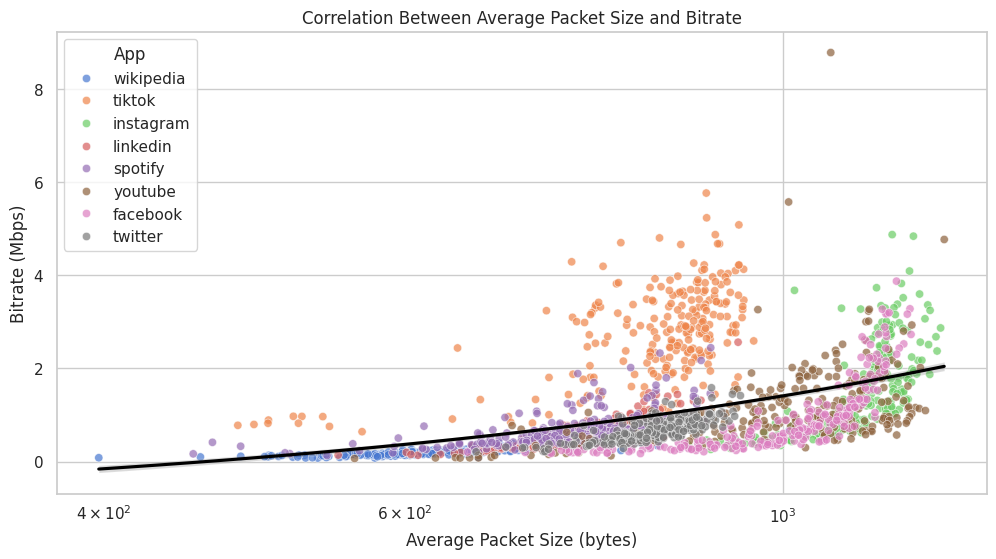

Pearson Correlation Between Total Packets and Bitrate: 0.8437 (p=0.0000)
Significant correlation detected between packet count and bitrate!
Pearson Correlation Between Packet Size and Bitrate: 0.4561 (p=0.0000)
Significant correlation detected between packet size and bitrate!


In [18]:
from scipy.stats import pearsonr

# Gather data for correlation analysis
correlation_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        correlation_data.append({
            "App": app,
            "Total Packets": len(pcap["packet_sizes"]),
            "Average Packet Size (bytes)": pcap["avg_packet_size"],
            "Bitrate (Mbps)": pcap["uplink_bitrate"] + pcap["downlink_bitrate"]
        })

# Convert to DataFrame
corr_df = pd.DataFrame(correlation_data)

# Scatter plot: Bitrate vs. Total Packets
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Total Packets", y="Bitrate (Mbps)", hue="App", data=corr_df, palette="coolwarm", alpha=0.7)
sns.regplot(x="Total Packets", y="Bitrate (Mbps)", data=corr_df, scatter=False, color="black")  # Regression line
plt.title("Correlation Between Total Packets and Bitrate")
plt.xlabel("Total Packets per PCAP")
plt.ylabel("Bitrate (Mbps)")
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Scatter plot: Bitrate vs. Average Packet Size
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Average Packet Size (bytes)", y="Bitrate (Mbps)", hue="App", data=corr_df, palette="muted", alpha=0.7)
sns.regplot(x="Average Packet Size (bytes)", y="Bitrate (Mbps)", data=corr_df, scatter=False, color="black")  # Regression line
plt.title("Correlation Between Average Packet Size and Bitrate")
plt.xlabel("Average Packet Size (bytes)")
plt.ylabel("Bitrate (Mbps)")
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Pearson Correlation Coefficients
corr_packets, p_packets = pearsonr(corr_df["Total Packets"], corr_df["Bitrate (Mbps)"])
corr_size, p_size = pearsonr(corr_df["Average Packet Size (bytes)"], corr_df["Bitrate (Mbps)"])

# Interpretation of correlation results
print(f"Pearson Correlation Between Total Packets and Bitrate: {corr_packets:.4f} (p={p_packets:.4f})")
if p_packets < 0.05:
    print("Significant correlation detected between packet count and bitrate!")
else:
    print("No strong correlation detected between packet count and bitrate.")

print(f"Pearson Correlation Between Packet Size and Bitrate: {corr_size:.4f} (p={p_size:.4f})")
if p_size < 0.05:
    print("Significant correlation detected between packet size and bitrate!")
else:
    print("No strong correlation detected between packet size and bitrate.")

#### 2.2.6 Correlation of Packet Count, PCAP Size, and Bitrates (X)

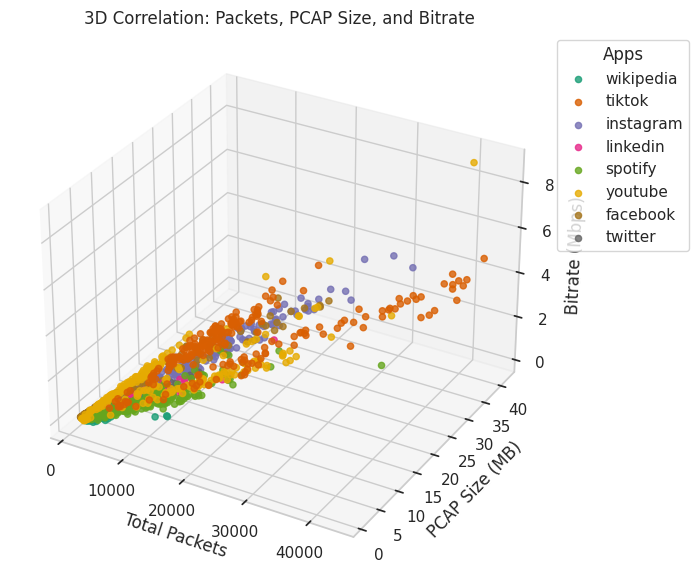

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Gather data for 3D correlation plot
correlation_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        correlation_data.append({
            "App": app,
            "Total Packets": len(pcap["packet_sizes"]),
            "PCAP Size (MB)": pcap["total_size_mb"],
            "Bitrate (Mbps)": pcap["uplink_bitrate"] + pcap["downlink_bitrate"]
        })

# Convert to DataFrame
corr_df = pd.DataFrame(correlation_data)

# Get unique colors for each app using seaborn's color palette
unique_apps = corr_df["App"].unique()
color_palette = sns.color_palette("Dark2", len(unique_apps))  # Use categorical colormap
app_colors = {app: color_palette[i] for i, app in enumerate(unique_apps)}

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with distinct colors
for app in unique_apps:
    app_data = corr_df[corr_df["App"] == app]
    ax.scatter(
        app_data["Total Packets"], app_data["PCAP Size (MB)"], app_data["Bitrate (Mbps)"], 
        color=app_colors[app], label=app, alpha=0.8
    )

# Labels & Title
ax.set_xlabel("Total Packets")
ax.set_ylabel("PCAP Size (MB)")
ax.set_zlabel("Bitrate (Mbps)")
ax.set_title("3D Correlation: Packets, PCAP Size, and Bitrate")

# Add legend
ax.legend(title="Apps", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### 2.3 Comparison of Packets' Interarrival Times

#### 2.3.1 Average Interarrival Times

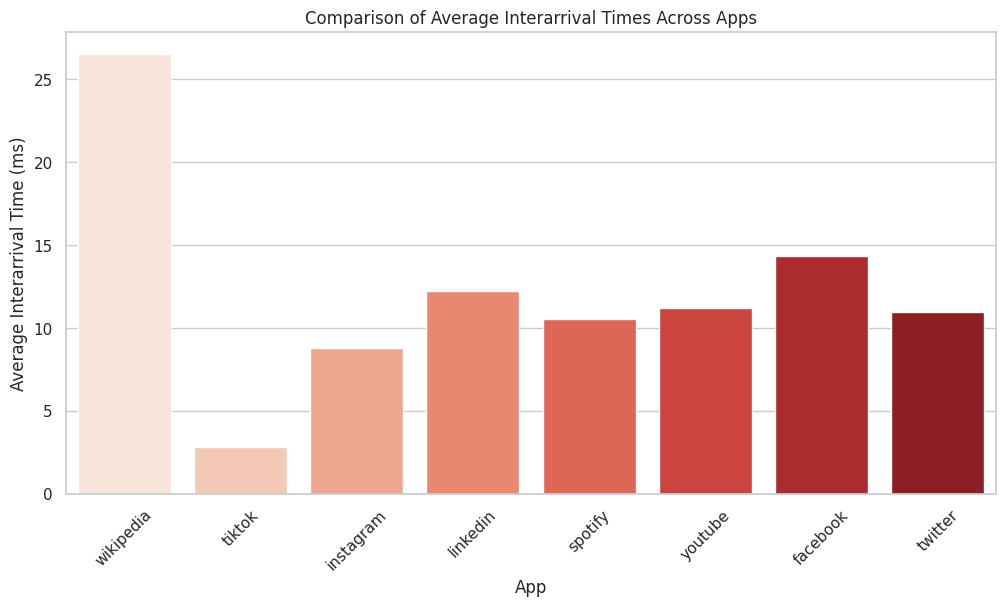

In [20]:
# Interarrival Time Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="App", y="Average Interarrival Time (ms)", data=avg_df, palette="Reds", hue="App", legend=False)
plt.title("Comparison of Average Interarrival Times Across Apps")
plt.xticks(rotation=45)
plt.show()

#### 2.3.2 Variablity of Packet Interrarival Times

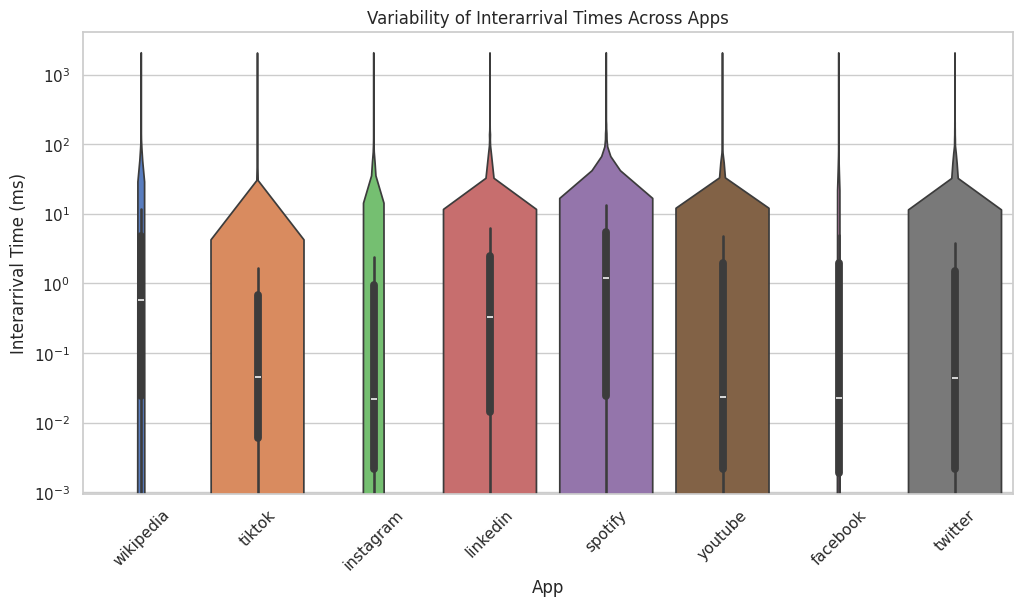

In [6]:
# Gather all interarrival times from all PCAPs of each app
interarrival_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        for inter_time in pcap["interarrival_times"]:
            interarrival_data.append({"App": app, "Interarrival Time (ms)": inter_time})

# Convert to DataFrame
interarrival_df = pd.DataFrame(interarrival_data)

# Violin Plot - Variability of Interarrival Times
plt.figure(figsize=(12, 6))
sns.violinplot(x="App", y="Interarrival Time (ms)", data=interarrival_df, palette="muted", hue="App", legend=False)
plt.title("Variability of Interarrival Times Across Apps")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visualization if needed
plt.show()

#### 2.3.3 Correlation between Interarrival Times and PCAP Sizes

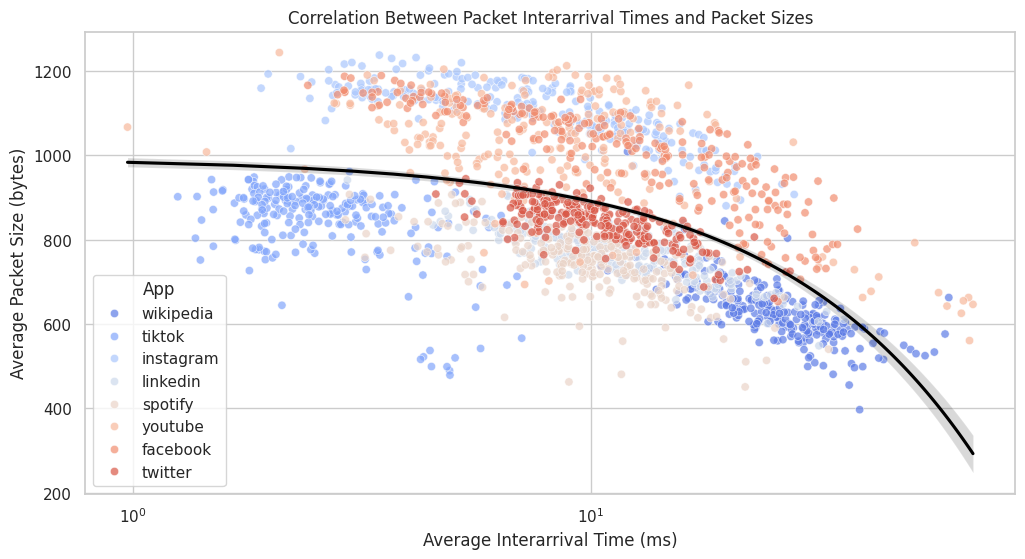

Pearson Correlation Between Interarrival Time and Packet Size: -0.5469 (p=0.0000)
Significant correlation detected!


In [7]:
from scipy.stats import pearsonr

# Gather data for correlation analysis
correlation_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        correlation_data.append({
            "App": app,
            "Average Packet Size (bytes)": pcap["avg_packet_size"],
            "Average Interarrival Time (ms)": pcap["avg_interarrival_time"]
        })

# Convert to DataFrame
corr_df = pd.DataFrame(correlation_data)

# Scatter plot: Packet Size vs. Interarrival Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Average Interarrival Time (ms)", y="Average Packet Size (bytes)", 
                hue="App", data=corr_df, palette="coolwarm", alpha=0.7)
sns.regplot(x="Average Interarrival Time (ms)", y="Average Packet Size (bytes)", 
            data=corr_df, scatter=False, color="black")  # Regression line
plt.title("Correlation Between Packet Interarrival Times and Packet Sizes")
plt.xlabel("Average Interarrival Time (ms)")
plt.ylabel("Average Packet Size (bytes)")
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Pearson Correlation Coefficient
corr, p_value = pearsonr(corr_df["Average Interarrival Time (ms)"], corr_df["Average Packet Size (bytes)"])

print(f"Pearson Correlation Between Interarrival Time and Packet Size: {corr:.4f} (p={p_value:.4f})")

# Interpretation of correlation result
if p_value < 0.05:
    print("Significant correlation detected!")
else:
    print("No strong correlation detected.")

#### 2.3.4 Correlation between Interarrival Times and Packet Count

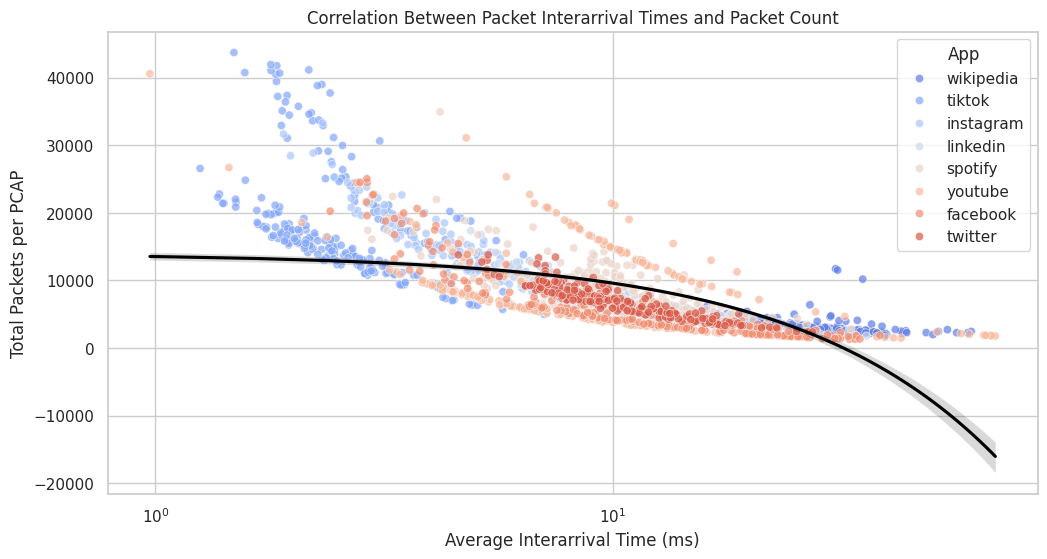

Pearson Correlation Between Interarrival Time and Packet Count: -0.6246 (p=0.0000)
Significant correlation detected!


In [8]:
from scipy.stats import pearsonr

# Gather data for correlation analysis
correlation_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        correlation_data.append({
            "App": app,
            "Total Packets": len(pcap["packet_sizes"]),
            "Average Interarrival Time (ms)": pcap["avg_interarrival_time"]
        })

# Convert to DataFrame
corr_df = pd.DataFrame(correlation_data)

# Scatter plot: Packet Count vs. Interarrival Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Average Interarrival Time (ms)", y="Total Packets", hue="App", data=corr_df, palette="coolwarm", alpha=0.7)
sns.regplot(x="Average Interarrival Time (ms)", y="Total Packets", data=corr_df, scatter=False, color="black")  # Regression line
plt.title("Correlation Between Packet Interarrival Times and Packet Count")
plt.xlabel("Average Interarrival Time (ms)")
plt.ylabel("Total Packets per PCAP")
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Pearson Correlation Coefficient
corr, p_value = pearsonr(corr_df["Average Interarrival Time (ms)"], corr_df["Total Packets"])

print(f"Pearson Correlation Between Interarrival Time and Packet Count: {corr:.4f} (p={p_value:.4f})")

# Interpretation of correlation result
if p_value < 0.05:
    print("Significant correlation detected!")
else:
    print("No strong correlation detected.")

#### 2.3.5 Correlation between Interarrival Times and Bitrates

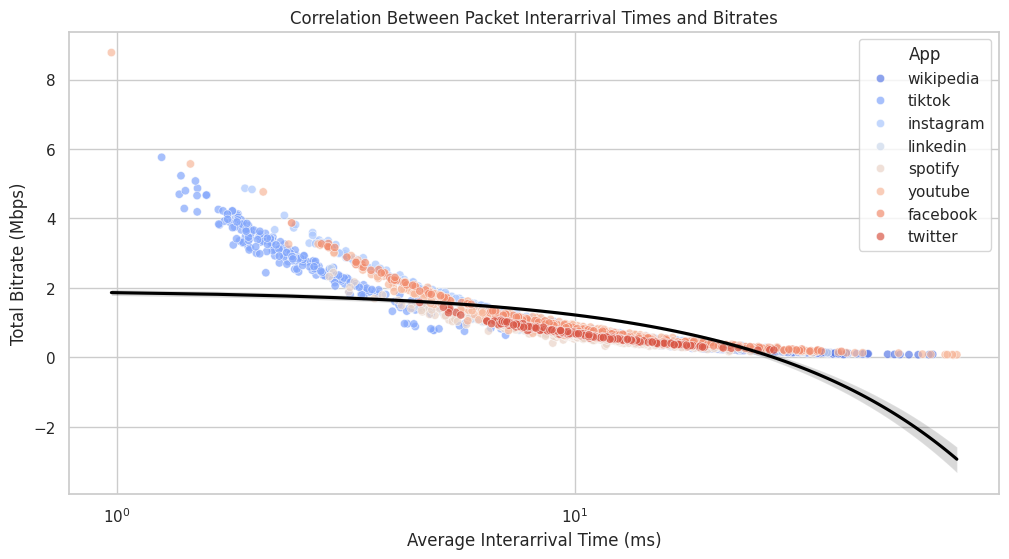

Pearson Correlation Between Interarrival Time and Bitrate: -0.6653 (p=0.0000)
Significant correlation detected!


In [9]:
from scipy.stats import pearsonr

# Gather data for correlation analysis
correlation_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        correlation_data.append({
            "App": app,
            "Bitrate (Mbps)": pcap["uplink_bitrate"] + pcap["downlink_bitrate"],
            "Average Interarrival Time (ms)": pcap["avg_interarrival_time"]
        })

# Convert to DataFrame
corr_df = pd.DataFrame(correlation_data)

# Scatter plot: Bitrate vs. Interarrival Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Average Interarrival Time (ms)", y="Bitrate (Mbps)", hue="App", data=corr_df, palette="coolwarm", alpha=0.7)
sns.regplot(x="Average Interarrival Time (ms)", y="Bitrate (Mbps)", data=corr_df, scatter=False, color="black")  # Regression line
plt.title("Correlation Between Packet Interarrival Times and Bitrates")
plt.xlabel("Average Interarrival Time (ms)")
plt.ylabel("Total Bitrate (Mbps)")
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Pearson Correlation Coefficient
corr, p_value = pearsonr(corr_df["Average Interarrival Time (ms)"], corr_df["Bitrate (Mbps)"])

print(f"Pearson Correlation Between Interarrival Time and Bitrate: {corr:.4f} (p={p_value:.4f})")

# Interpretation of correlation result
if p_value < 0.05:
    print("Significant correlation detected!")
else:
    print("No strong correlation detected.")

#### 2.3.3 Correlation between Packets, PCAPs, Bitrates, and Interarrival Times (X)

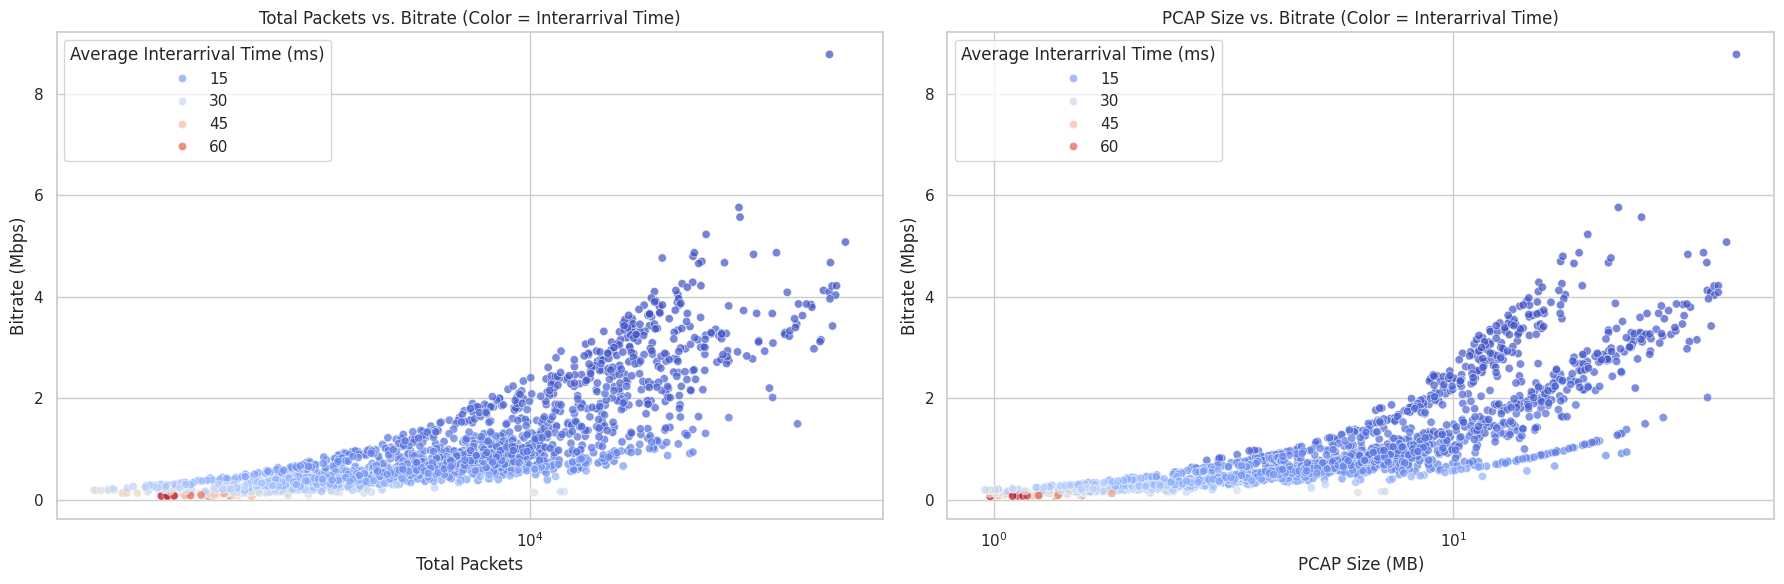

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Convert JSON data into a structured DataFrame
visualization_data = []
for app in app_names:
    for pcap in data[app]["pcaps"]:
        visualization_data.append({
            "App": app,
            "Total Packets": len(pcap["packet_sizes"]),
            "PCAP Size (MB)": pcap["total_size_mb"],
            "Bitrate (Mbps)": pcap["uplink_bitrate"] + pcap["downlink_bitrate"],
            "Average Interarrival Time (ms)": pcap["avg_interarrival_time"]
        })

# Convert to DataFrame
vis_df = pd.DataFrame(visualization_data)

# Scatter: Total Packets vs. Bitrate (Color = Interarrival Time)
sns.scatterplot(ax=axes[0], x=vis_df["Total Packets"], y=vis_df["Bitrate (Mbps)"], 
                hue=vis_df["Average Interarrival Time (ms)"], palette="coolwarm", alpha=0.7)
axes[0].set_title("Total Packets vs. Bitrate (Color = Interarrival Time)")
axes[0].set_xscale("log")

# Scatter: PCAP Size vs. Bitrate (Color = Interarrival Time)
sns.scatterplot(ax=axes[1], x=vis_df["PCAP Size (MB)"], y=vis_df["Bitrate (Mbps)"], 
                hue=vis_df["Average Interarrival Time (ms)"], palette="coolwarm", alpha=0.7)
axes[1].set_title("PCAP Size vs. Bitrate (Color = Interarrival Time)")
axes[1].set_xscale("log")

plt.tight_layout()
plt.show()

### 2.4 Comparison of Protocols

#### 2.4.1 UDP VS TCP

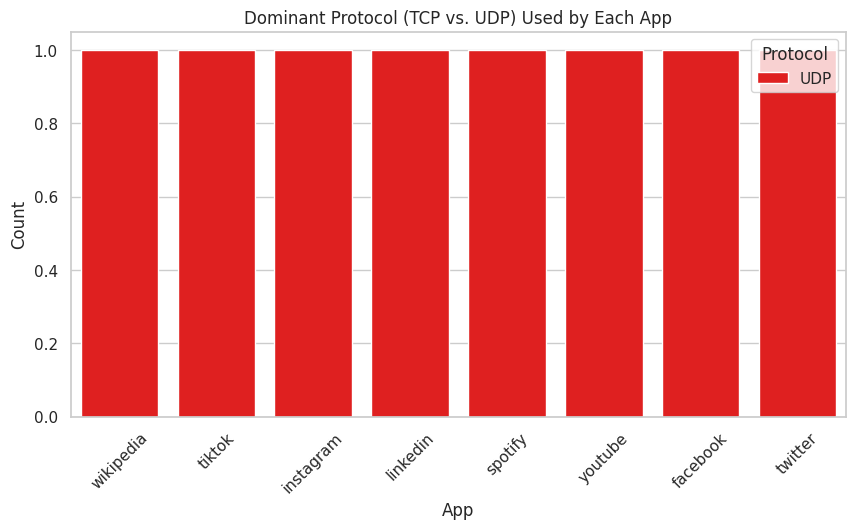

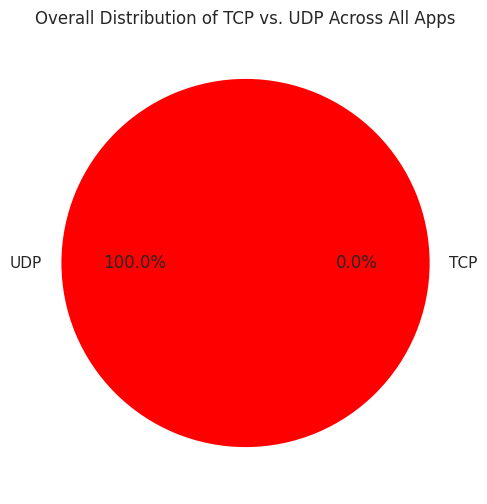

In [11]:
# Gather protocol data per app
protocol_data = []
protocol_counts = {"TCP": 0, "UDP": 0}  # To track overall usage

for app in app_names:
    dominant_protocol = data[app]["average"]["dominant_protocol"]
    protocol_data.append({"App": app, "Protocol": dominant_protocol})
    protocol_counts[dominant_protocol] += 1  # Count occurrences of TCP & UDP

# Convert to DataFrame
protocol_df = pd.DataFrame(protocol_data)

# 🔹 Bar plot: Dominant protocol per app
plt.figure(figsize=(10, 5))
sns.countplot(x="App", hue="Protocol", data=protocol_df, palette={"TCP": "blue", "UDP": "red"})
plt.title("Dominant Protocol (TCP vs. UDP) Used by Each App")
plt.xlabel("App")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Protocol")
plt.show()

# 🔹 Pie chart: Overall TCP vs. UDP usage
plt.figure(figsize=(6, 6))
plt.pie(protocol_counts.values(), labels=protocol_counts.keys(), autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Overall Distribution of TCP vs. UDP Across All Apps")
plt.show()

## 3. Per-App Visualizations

In this last section, we provide individual details of each app's main features. 

The features showed are the same analyzed earlier (Packets, Bitrates, and Interarrival Times).

### 3.1 Distribution of Packet Sizes per App


Visualizing data for: wikipedia



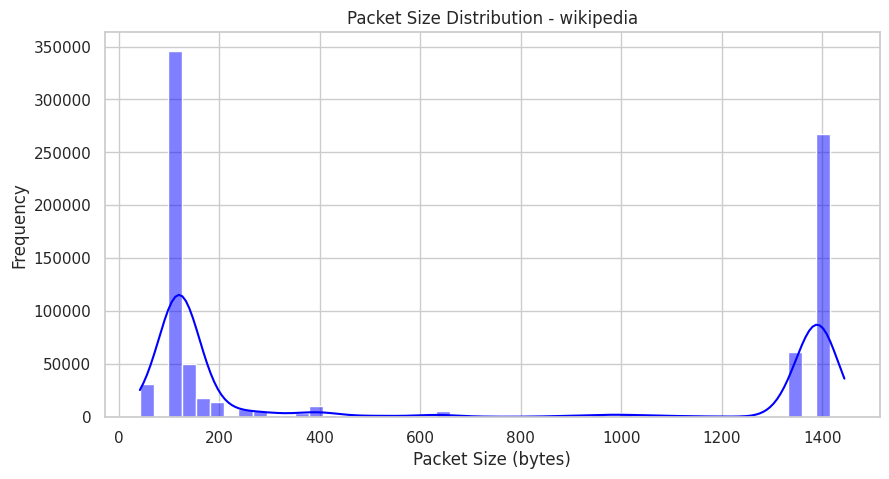


Visualizing data for: tiktok



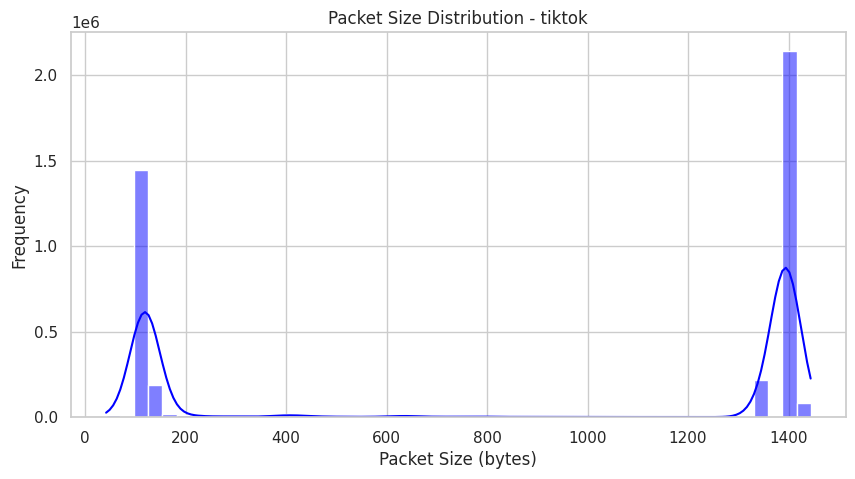


Visualizing data for: instagram



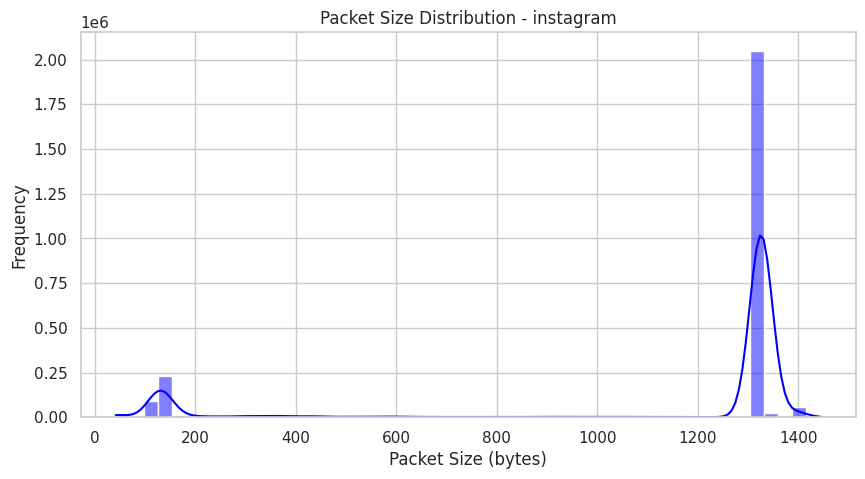


Visualizing data for: linkedin



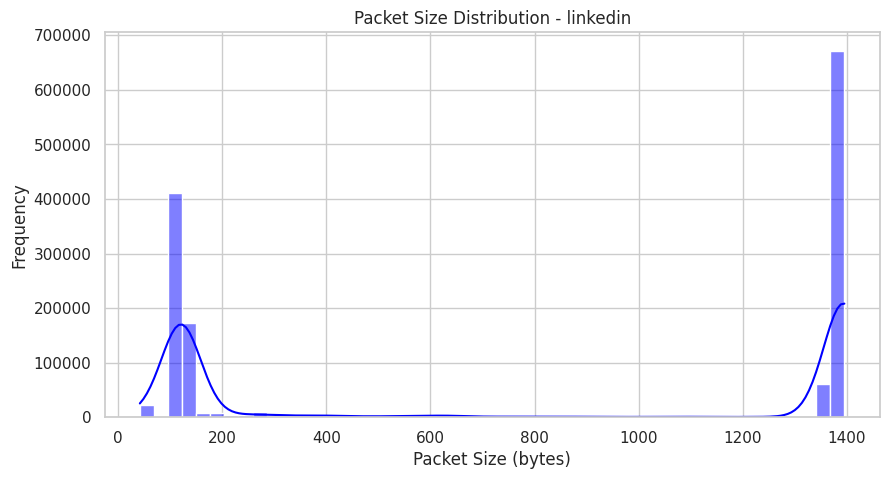


Visualizing data for: spotify



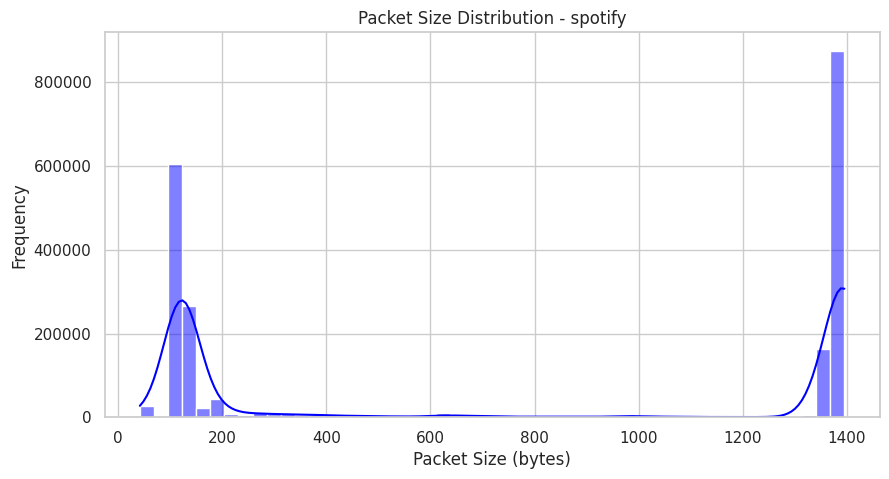


Visualizing data for: youtube



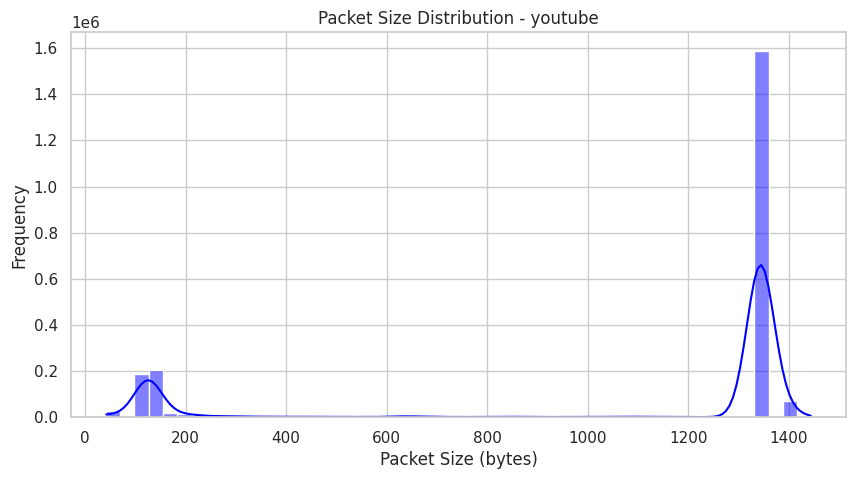


Visualizing data for: facebook



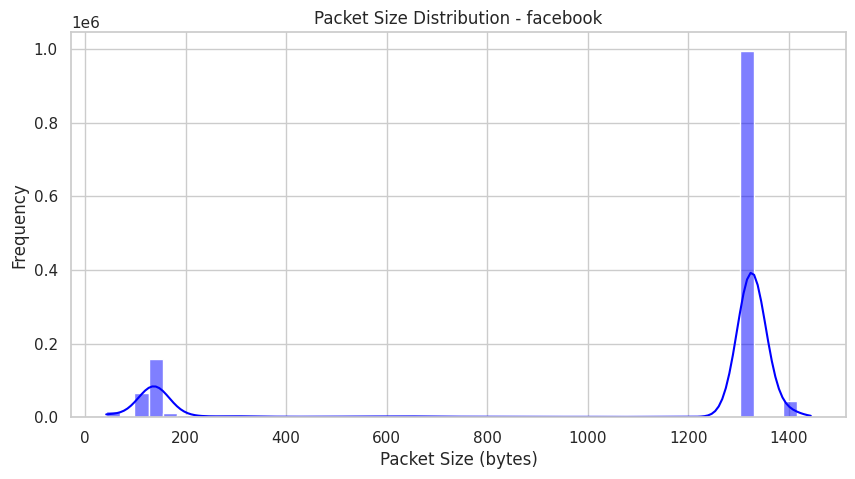


Visualizing data for: twitter



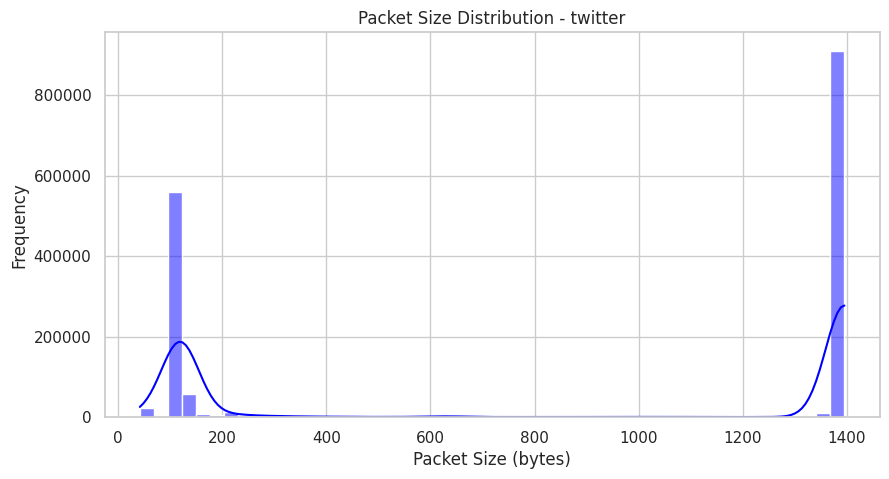

In [ ]:
for app in app_names:
    print(f"\nVisualizing data for: {app}\n")
    app_data = pd.DataFrame(data[app]["pcaps"])
    
    # Packet Sizes Distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(app_data.explode("packet_sizes")["packet_sizes"], bins=50, kde=True, color="blue")
    plt.title(f"Packet Size Distribution - {app}")
    plt.xlabel("Packet Size (bytes)")
    plt.ylabel("Frequency")
    plt.show()

### 3.2 Average Uplink and Downlink Bitrate per App


Visualizing data for: wikipedia



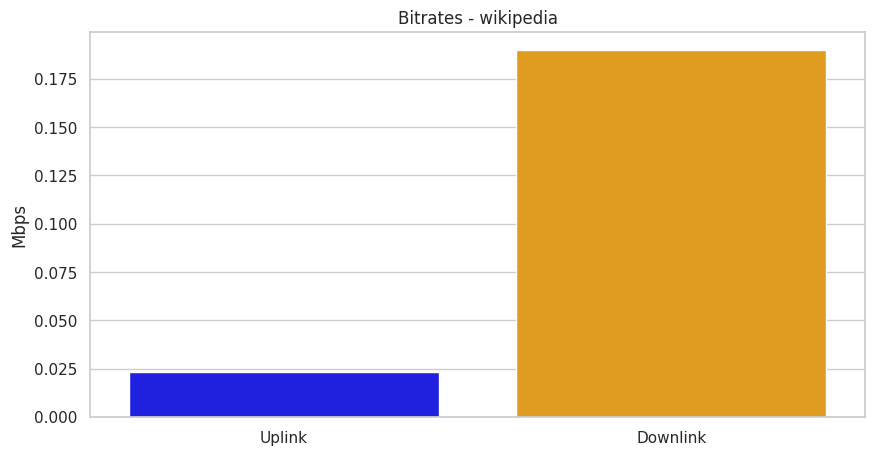


Visualizing data for: tiktok



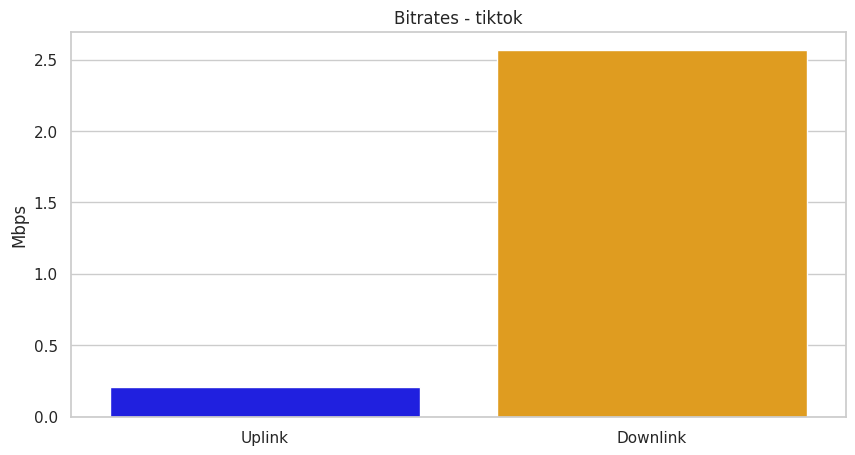


Visualizing data for: instagram



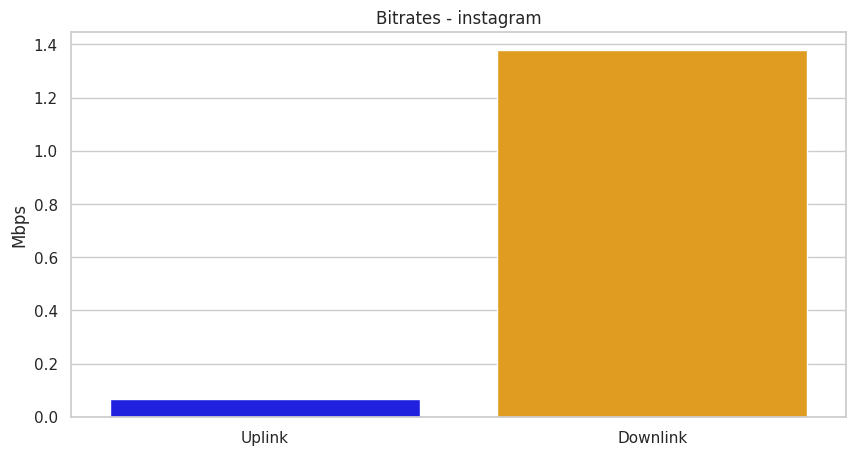


Visualizing data for: linkedin



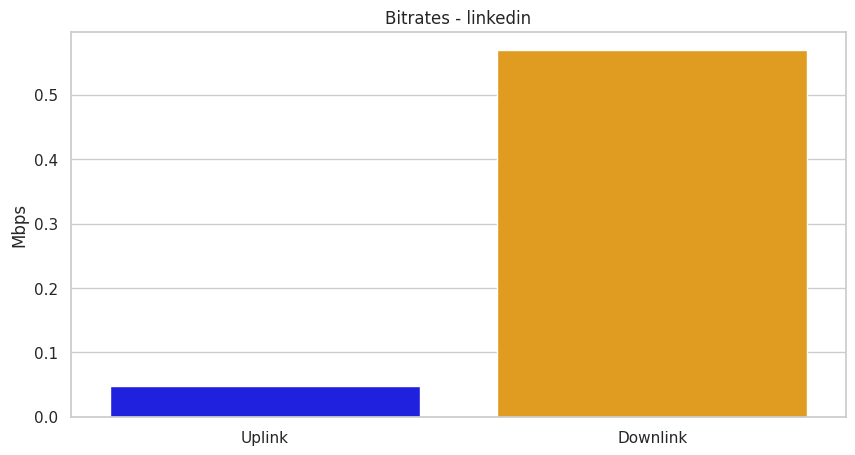


Visualizing data for: spotify



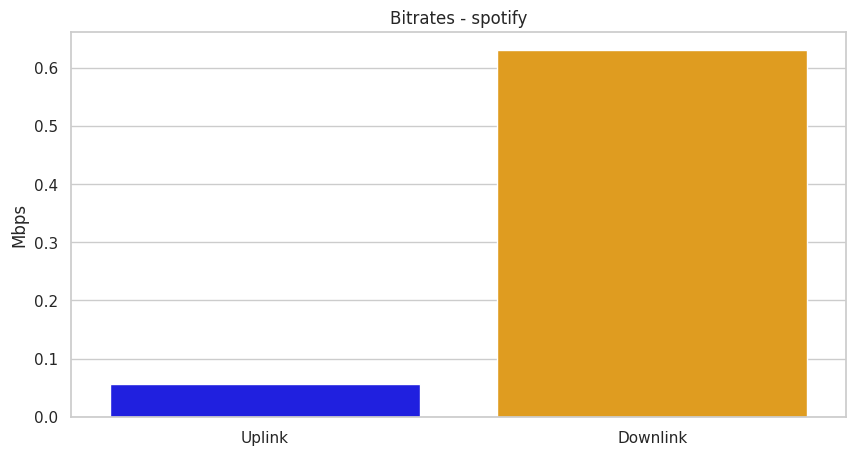


Visualizing data for: youtube



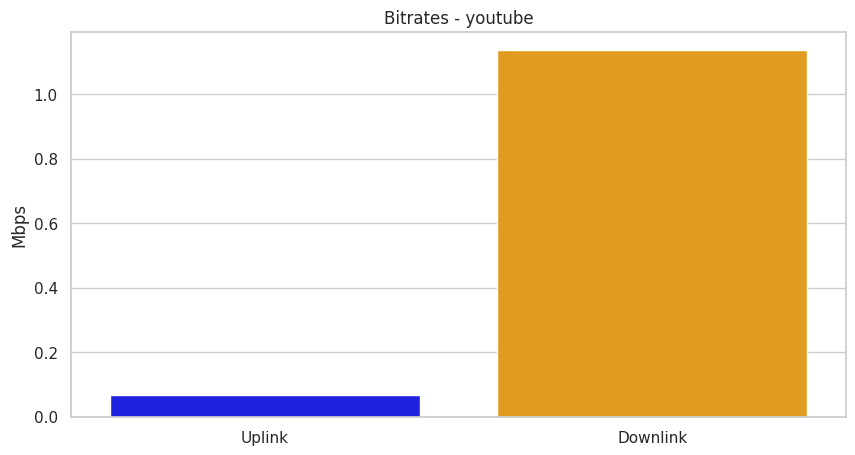


Visualizing data for: facebook



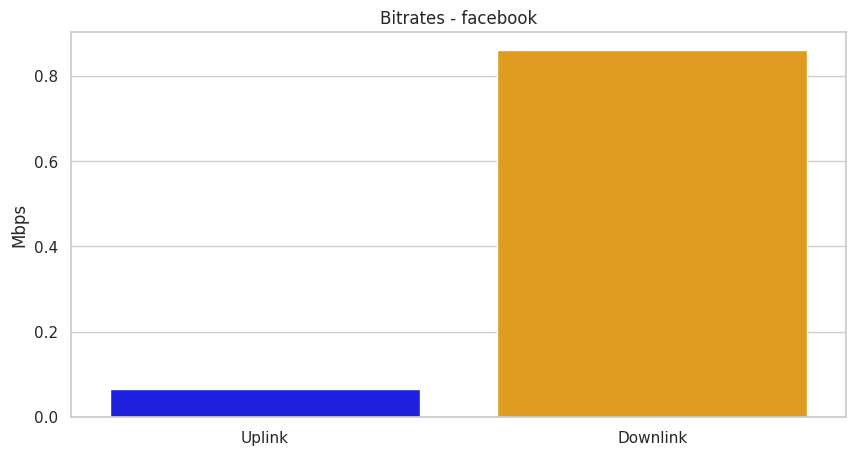


Visualizing data for: twitter



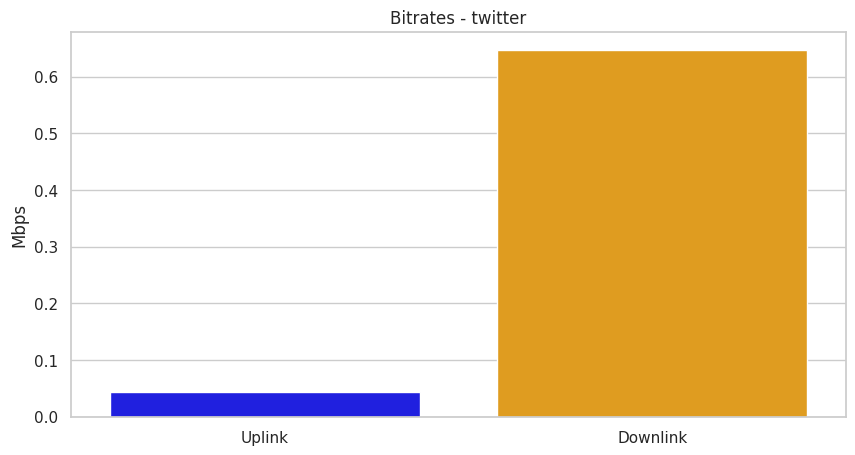

In [ ]:
for app in app_names:
    print(f"\nVisualizing data for: {app}\n")
    app_data = pd.DataFrame(data[app]["pcaps"])
    
    # Uplink & Downlink Bitrates
    plt.figure(figsize=(10, 5))
    sns.barplot(x=["Uplink", "Downlink"], y=[data[app]["average"]["uplink_bitrate"], data[app]["average"]["downlink_bitrate"]], palette=["blue", "orange"], hue=["Uplink", "Downlink"], legend=False)
    plt.title(f"Bitrates - {app}")
    plt.ylabel("Mbps")
    plt.show()

### 3.3 Distribution of Packets' Interrarival Times per App


Visualizing data for: wikipedia



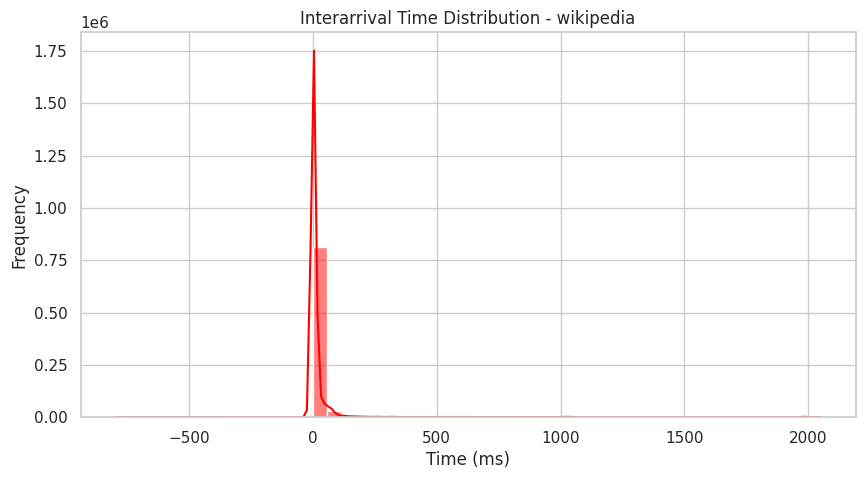


Visualizing data for: tiktok



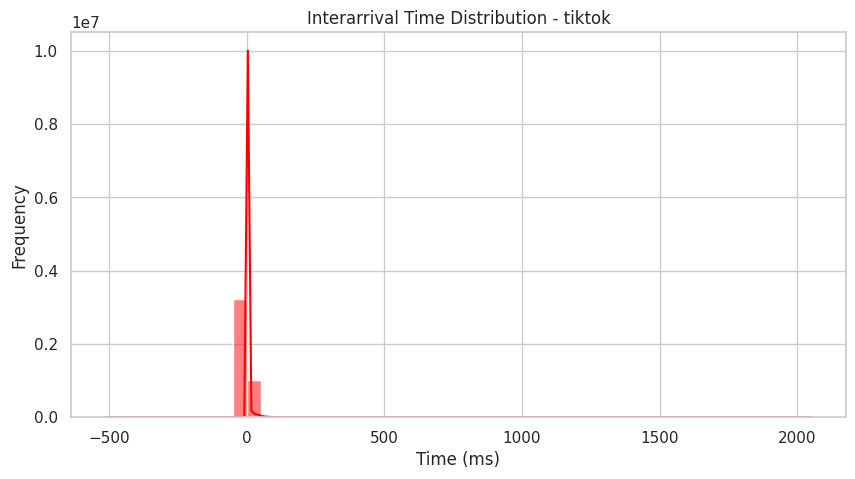


Visualizing data for: instagram



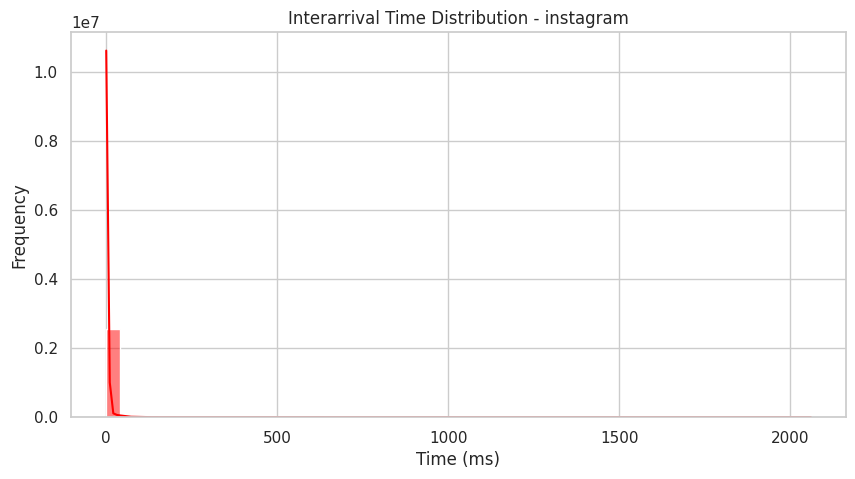


Visualizing data for: linkedin



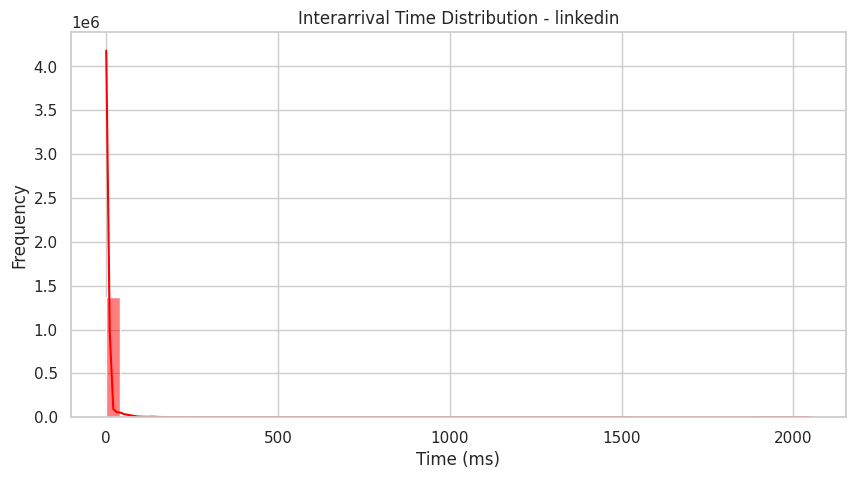


Visualizing data for: spotify



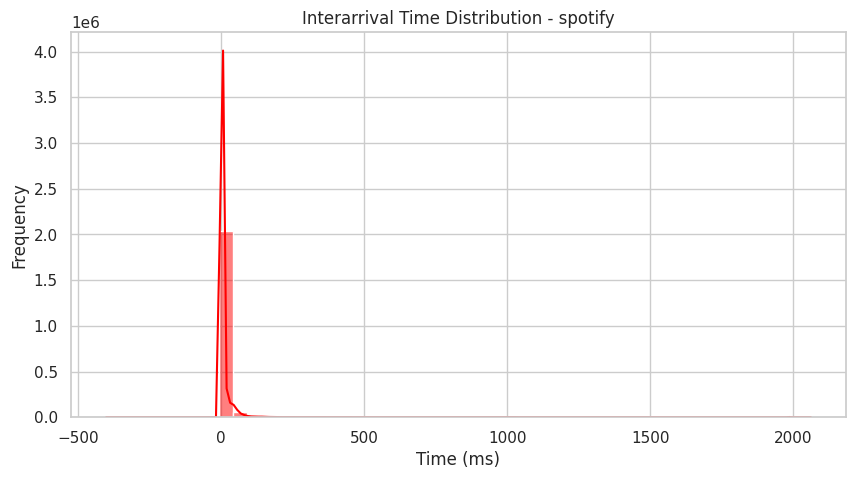


Visualizing data for: youtube



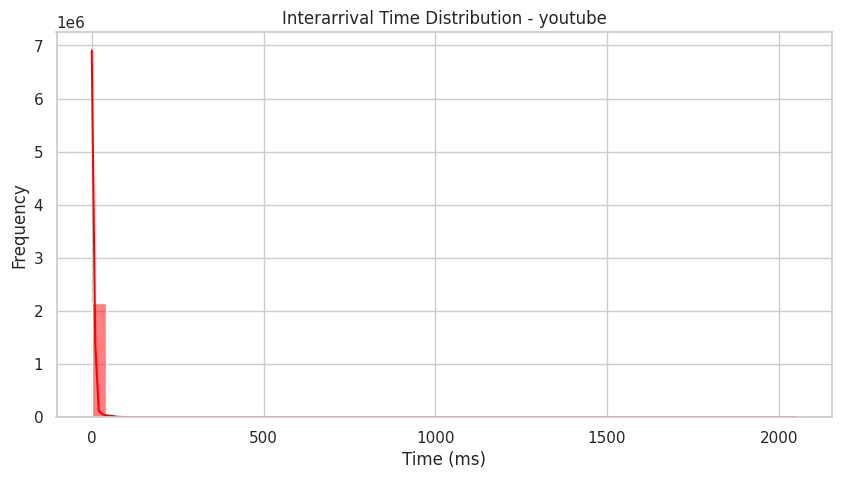


Visualizing data for: facebook



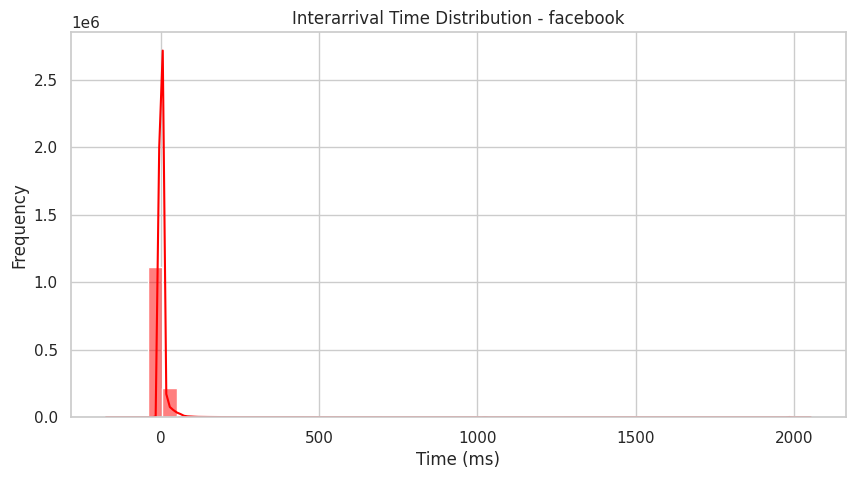


Visualizing data for: twitter



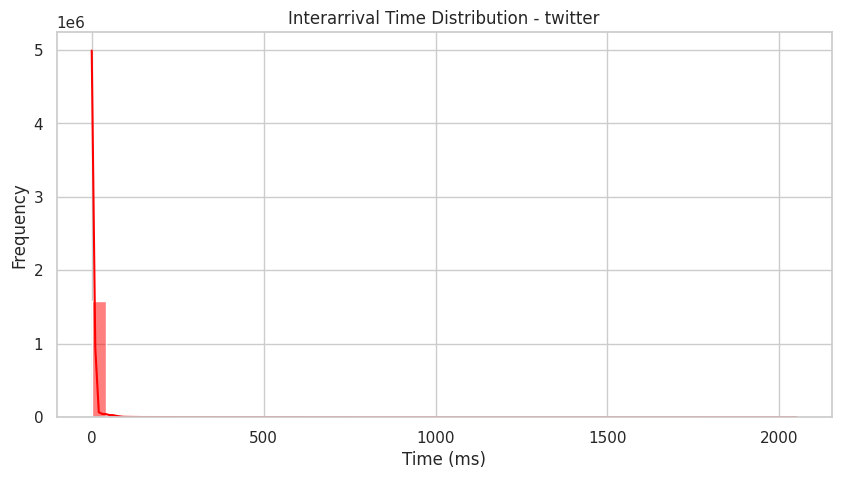

In [12]:
for app in app_names:
    print(f"\nVisualizing data for: {app}\n")
    app_data = pd.DataFrame(data[app]["pcaps"])
    
    # Interarrival Times
    plt.figure(figsize=(10, 5))
    sns.histplot(app_data.explode("interarrival_times")["interarrival_times"], bins=50, kde=True, color="red")
    plt.title(f"Interarrival Time Distribution - {app}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Frequency")
    plt.show()

## Visualisation Completed!